In [1]:
using Flux, DataFrames, CSV, Query, CUDA, MLUtils, ProgressMeter, Plots

SyntaxError: invalid syntax (<ipython-input-1-22ed09705cc6>, line 1)

In [ ]:
df_train = CSV.read("./train.csv", DataFrame)
print(join(String.(names(df_train)), ", "))

id, X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas, Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults

In [ ]:
X_train_all = Matrix(df_train[:, 2:28])
X_train_all = hcat(normalise.(eachcol(X_train_all'))...)
Y_train_all = Matrix(df_train[:, 29:35])'
size(X_train_all), size(Y_train_all)

((27, 19219), (7, 19219))

In [ ]:
N = 20
dataset = (X_train_all, Y_train_all)
loss(x, y) = Flux.Losses.mse(model(x), y)
model = Chain(
    Dense(27 => N, tanh),
    BatchNorm(N),
    Dense(N => N, relu),
    BatchNorm(N),
    Dense(N => 7, relu),
    softmax
    # (x -> x .== maximum(x))
)
opt = Flux.setup(Flux.Adam(), model)
loader = DataLoader(dataset, batchsize=128, shuffle=true)
losses = []
model

Chain(
  Dense(27 => 20, tanh),                # 560 parameters
  BatchNorm(20),                        # 40 parameters, plus 40
  Dense(20 => 20, relu),                # 420 parameters
  BatchNorm(20),                        # 40 parameters, plus 40
  Dense(20 => 7, relu),                 # 147 parameters
  NNlib.softmax,
)         # Total: 10 trainable arrays, 1_207 parameters,
          # plus 4 non-trainable, 80 parameters, summarysize 5.855 KiB.

Progress: 100%|█████████████████████████████████████████| Time: 0:00:35


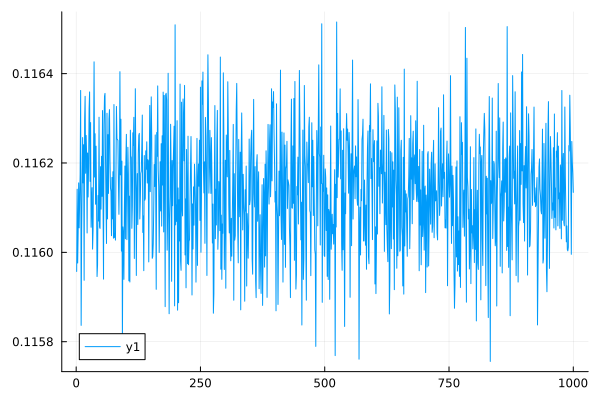

In [ ]:
@showprogress for epoch in 1:500
    ls = []
    for (x, y) in loader
        l, grads = Flux.withgradient(model) do m
            loss(x, y)
        end
        Flux.update!(opt, model, grads[1])
        push!(ls, l)
    end
    push!(losses, sum(ls)/length(ls))
end
plot(losses)

In [ ]:
mean(x) = sum(x)/length(x)
accuracy(m, x, y) = mean(m(x) .== y)
hardmax(x) = x.==maximum(x)

hardmax (generic function with 1 method)

In [ ]:
df_test = CSV.read("./test.csv", DataFrame)
print(join(String.(names(df_train)), ", "))
X_test_all = Matrix(df_train[:, 2:28])
X_test_all = hcat(normalise.(eachcol(X_test_all'))...)
Y_test_all = Matrix(df_train[:, 29:35])'
size(X_test_all), size(Y_test_all)

id, X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas, Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults

((27, 19219), (7, 19219))

In [ ]:
accuracy(hardmax∘model, X_test_all, Y_test_all)

0.8630521879390187

In [ ]:
accuracy(hardmax∘model, X_test_all, Y_test_all)

0.8630521879390187

In [ ]:
accuracy(hardmax∘model, X_train_all, Y_train_all)

0.8630521879390187